# kramer2.0 Experiment 03: Figures
## Angelique I. Delarazan
### kramer2.0_experiment_03_vC2
### Retrieval Tasks: Free Recall

## Set Up

### Import packages

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from scipy import stats
import itertools  # Import the itertools module
# import quail
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_partregress_grid
import pingouin as pg
from pingouin import anova as pg_anova
from psifr import fr
import tensorflow as tf
import tensorflow_hub as hub
import rpy2
from scipy.spatial.distance import squareform
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chisquare
import ptitprince as pt
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Universal Sentence Encoder Modules

In [2]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


### Create Figures

In [2]:
condition_colors = {
    'coherent_short': '#6b7a8d',
    'coherent_long': '#2a3f67',
    'unrelated_short': '#b27077',
    'unrelated_long': '#91323d',
    'mainplot': '#196c2f',
    'coherent': '#2a3f67',
    'unrelated': '#91323d',
    'all': '#450d64',
    'temporal_cluster_light':'#cf7a35',
    'temporal_cluster_dark': '#ca6b1e',
    'category_cluster_light':'#ffece4',
    'category_cluster_dark':'#307095',
    'semantic_cluster_light':'#f0dcf4',
    'semantic_cluster_dark':'#5d3877'
}

Barplots with all sideplot conditions

In [3]:
def plot_barplot_sideplots(data, x, y, y_label, figsize=(5.8, 2.4)):
    fig, ax = plt.subplots(figsize=figsize, facecolor='none')

    xtick_order = ['coherent_short', 'coherent_long', 'unrelated_short', 'unrelated_long']
    xtick_labels = {
        'coherent_short': 'Coherent Narrative\nShort Lag',
        'coherent_long': 'Coherent Narrative\nLong Lag',
        'unrelated_short': 'Unrelated Narrative\nShort Lag',
        'unrelated_long': 'Unrelated Narrative\nLong Lag'
    }
    xtick_colors = {
        'coherent_short': '#6b7a8d',
        'coherent_long': '#2a3f67',
        'unrelated_short': '#b27077',
        'unrelated_long': '#91323d'
    }

    sns.stripplot(
        data=data,
        x=x,
        y=y,
        hue=x,
        order=xtick_order,
        palette=xtick_colors, 
        legend=False,
        size=2,
        linewidth=0.3,
        ax=ax
    )

    sns.barplot(
        data=data,
        x=x,
        y=y,
        hue=x,
        errorbar=('ci', 95),
        err_kws={'color': 'black', 'linewidth': 0.8},
        capsize=0.05,
        order=xtick_order,
        palette=xtick_colors,
        edgecolor='black',
        linewidth=0.8,
        legend=False,
        ax=ax
    )

    ax.set_xlabel('')
    ax.set_ylabel(y_label, fontsize=8)
    ax.set_xticklabels([xtick_labels[cat] for cat in xtick_order], fontsize=6)
    ax.tick_params(axis='y', labelsize=8)
    
    return fig, ax


Lag-CRP Plots

In [4]:
def plot_lag_crp(data, condition):
    lagcrp = data
    lagcrp['lag'] = lagcrp['lag'].astype(int)

    fig, ax = plt.subplots(figsize=(4.35, 2.4), facecolor='none')

    # Plotting the lineplot for segments excluding -1 and 1
    sns.lineplot(
        data=lagcrp[(lagcrp['lag'] > -1) & (lagcrp['lag'] < 1)],
        x='lag',
        y='prob',
        linewidth=1,
        color=condition,  # Setting the line color
        markers=True,
        errorbar=None,
        ax=ax
    )

    # Plotting separate line segments for data before -1 and after 1
    sns.lineplot(
        data=lagcrp[lagcrp['lag'] <= -1],
        x='lag',
        y='prob',
        linewidth=1,
        color=condition,  # Setting the line color
        markers=True,
        errorbar=None,
        ax=ax
    )
    sns.lineplot(
        data=lagcrp[lagcrp['lag'] >= 1],
        x='lag',
        y='prob',
        linewidth=1,
        color=condition,  # Setting the line color
        markers=True,
        errorbar=None,
        ax=ax
    )

        # Calculate mean proportions for each x-value
    mean_values = lagcrp.groupby('lag')['prob'].mean().reset_index()

    # Plotting dots at mean pointsx
    sns.scatterplot(
        data=mean_values[mean_values['lag']!= 0],
        x='lag',
        y='prob',
        color=condition,  # Dot color
        s=25,  # Dot size
        ax=ax
    )

    # Setting x-axis ticks to integers 1 to 18
    ax.set_xticks(range(-17, 18, 2))  # Set x-tick positions from 1 to 18
    ax.set_xticklabels(range(-17, 18, 2), fontsize=6)

    # Setting labels and font sizes
    ax.set_xlabel('Relative Event Number (Lag)', fontsize=8)
    ax.set_ylabel('Conditional Response Probability (CRP)', fontsize=8)
    ax.tick_params(axis='y', labelsize=6)
    ax.set_ylim(0, 1.0)

    return fig, ax

    plt.show()

Rank Plots

In [5]:
def plot_ranks(data, x, y, y_label, dot_color, color, chance, figsize=(2.4, 2.4)):
    fig, ax = plt.subplots(figsize=figsize, facecolor='none')


    sns.violinplot(
        data=data,
        x=x,
        y=y,
        color=color,
        edgecolor=color,
        linewidth=1,
        fill=False,
        ax=ax,
    )
    
    sns.stripplot(
        data=data,
        x=x,
        y=y,
        color=dot_color,
        size=1.5,
        edgecolor=dot_color,
        linewidth=1,
        ax=ax
    )

    ax.set_ylabel('')
    ax.set_xlabel(y_label, fontsize=8)
    ax.set_yticks([])
    ax.axvline(x=chance, color='grey', linestyle='--', linewidth=1) 
    ax.tick_params(axis='y', labelsize=6)

        # Set x-axis ticks and labels from 0 to 1 in increments of 0.25 (temporal cluster and semantic cluster)
    # ax.set_xticks([i / 4 for i in range(5)])
    # ax.set_xticklabels([f'{i / 4:.2f}' for i in range(5)], fontsize=6)

        # Set x-axis limits from -1 to 1 in increments of 0.5 (category ARC)
    ax.set_xlim(-1, 1.25)
    ax.set_xticks([i / 2 for i in range(-2, 3)])  # -2, -1, 0, 1, 2
    ax.set_xticklabels([f'{i / 2:.2f}' for i in range(-2, 3)], fontsize=6)  # -1.0, -0.5, 0.0, 0.5, 1.0
    
    return fig, ax

# Example usage:
# Assuming 'recall' is your dataset and 'word_count' is the column you want to use for y-axis
# create_sideplot_plots(recall, 'condition', 'word_count', 'Word Count')


Plot correlations

In [6]:
def plot_correlation(data, x, y, color, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(2.4, 2.4), facecolor='none')

    sns.regplot(
        data=data,
        x=x,
        y=y,
        color=color,
        scatter_kws={'s': 10, 'edgecolor': 'none'},  # Adjust the size of the dots
        line_kws={'linewidth': None},  # Adjust the line width
        truncate=True,
        ax=ax
    )

    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

    #     # Set x-axis limits from 0 to 1 in increments of 0.25
    # ax.set_xlim(0, 1)
    # ax.set_xticks([i / 4 for i in range(5)])
    # ax.set_xticklabels([f'{i / 4:.2f}' for i in range(5)], fontsize=6)

    return fig, ax

## Load Data

### Overall Recall

In [7]:
recall = pd.read_csv('~/Box Sync/aidelarazan_box/Projects/kramer2.0/data/kramer2.0_vC2/kramer2.0_vC2_sub-all_desc-recall.csv')
recall = recall[recall['subject']!=652]
recall['condition'] = recall['coherence'] + '_' + recall['lag']
recall['word_count'] = recall['response_detail'].str.split().str.len()
recall = recall[recall['word_count']!=0]
recall.dropna(subset=['word_count'], inplace=True)
print(recall.columns.tolist())
recall.head()

['subject', 'version', 'character', 'act', 'event', 'coherence', 'lag', 'correct_detail', 'correct_order', 'response_detail', 'response_order', 'notes', 'rater', 'condition', 'word_count']


,subject,version,character,act,event,coherence,lag,correct_detail,correct_order,response_detail,response_order,notes,rater,condition,word_count
0,604,1,charles,1,A,mainplot,mainplot,It was Charles Bort’s big break: there was fin...,1.0,Charles Bort was a journalist taking photos fo...,1.0,Perceptual features of Charles,aid,mainplot_mainplot,24.0
1,604,1,beatrice,1,A,unrelated,long,"A tremor ran through his leg, as his phone rec...",2.0,"On his way, Charles was interrupted by text me...",3.0,Vague,aid,unrelated_long,9.0
2,604,1,beatrice,1,A,unrelated,long,"A tremor ran through his leg, as his phone rec...",2.0,"First, Beatrice Small called him and asked him...",6.0,Vague,aid,unrelated_long,117.0
3,604,1,charles,1,B,mainplot,mainplot,"The newsroom was quiet, but Charles could make...",3.0,"He went into work one day and the head editor,...",2.0,perceptual features of Charles' boss described,aid,mainplot_mainplot,103.0
4,604,1,melvin,1,A,coherent,long,Charles was interrupted by a video call from M...,4.0,and video calls from his friends.,4.0,Vague,aid,coherent_long,6.0


### Creating Dataframe to fit psifr package

In [8]:
recall = pd.read_csv('~/Box Sync/aidelarazan_box/Projects/kramer2.0/data/kramer2.0_vC2/kramer2.0_vC2_sub-all_desc-recall.csv')
recall = recall[recall['subject']!=652]
recall['condition'] = recall['coherence'] + '_' + recall['lag']
recall['word_count'] = recall['response_detail'].str.split().str.len()


Subset existing data so we format it to match psifr. We want an encoded story one, which is what participants were introduced to.

In [9]:
encoded_story = recall[['subject', 'version', 'character', 'act', 'event', 'coherence', 'lag', 'condition', 'correct_detail', 'correct_order']]
encoded_story = encoded_story.assign(trial_type='study')
encoded_story = encoded_story.assign(list=1)
encoded_story['item'] = recall['character'] + recall['act'].astype(str) + recall['event']
encoded_story = encoded_story.rename(columns={'correct_order':'position', 'correct_detail':'detail'})
encoded_story.dropna(subset=['position'], inplace=True)
encoded_story.drop_duplicates(inplace=True)
encoded_story.reset_index()
encoded_story.head()

,subject,version,character,act,event,coherence,lag,condition,detail,position,trial_type,list,item
0,604,1,charles,1,A,mainplot,mainplot,mainplot_mainplot,It was Charles Bort’s big break: there was fin...,1.0,study,1,charles1A
1,604,1,beatrice,1,A,unrelated,long,unrelated_long,"A tremor ran through his leg, as his phone rec...",2.0,study,1,beatrice1A
3,604,1,charles,1,B,mainplot,mainplot,mainplot_mainplot,"The newsroom was quiet, but Charles could make...",3.0,study,1,charles1B
4,604,1,melvin,1,A,coherent,long,coherent_long,Charles was interrupted by a video call from M...,4.0,study,1,melvin1A
6,604,1,charles,1,C,mainplot,mainplot,mainplot_mainplot,Twenty minutes later Charles chained the bike ...,5.0,study,1,charles1C


Subset existing data so we format it to match psifr. We want a recalled one, which is what participants recalled.

In [10]:
recalled_story = recall[['subject', 'version', 'character', 'act', 'event', 'coherence', 'lag', 'condition', 'response_detail', 'response_order']]
recalled_story = recalled_story.assign(trial_type='recall')
recalled_story = recalled_story.assign(list=1)
recalled_story['item'] = recall['character'] + recall['act'].astype(str) + recall['event']
recalled_story.dropna(subset=['response_order'], inplace=True)
recalled_story['response_order'] = recalled_story['response_order'].astype(int)
recalled_story = recalled_story.rename(columns={'response_order':'position', 'response_detail':'detail'})
recalled_story.reset_index(drop=True, inplace=True)
recalled_story.head()

,subject,version,character,act,event,coherence,lag,condition,detail,position,trial_type,list,item
0,604,1,charles,1,A,mainplot,mainplot,mainplot_mainplot,Charles Bort was a journalist taking photos fo...,1,recall,1,charles1A
1,604,1,beatrice,1,A,unrelated,long,unrelated_long,"On his way, Charles was interrupted by text me...",3,recall,1,beatrice1A
2,604,1,beatrice,1,A,unrelated,long,unrelated_long,"First, Beatrice Small called him and asked him...",6,recall,1,beatrice1A
3,604,1,charles,1,B,mainplot,mainplot,mainplot_mainplot,"He went into work one day and the head editor,...",2,recall,1,charles1B
4,604,1,melvin,1,A,coherent,long,coherent_long,and video calls from his friends.,4,recall,1,melvin1A


Now, put encoded and recalled story together in a psifr format.

In [11]:
story = pd.concat([encoded_story, recalled_story])
story.reset_index()
story_df = fr.merge_free_recall(story, study_keys=['coherence', 'lag', 'condition'])
story_df.head()

,subject,list,item,input,output,study,recall,repeat,intrusion,coherence,lag,condition,prior_list,prior_input
0,604,1,charles1A,1.0,1.0,True,True,0,False,mainplot,mainplot,mainplot_mainplot,NaN,NaN
1,604,1,beatrice1A,2.0,3.0,True,True,0,False,unrelated,long,unrelated_long,NaN,NaN
2,604,1,beatrice1A,2.0,6.0,False,True,1,False,unrelated,long,unrelated_long,NaN,NaN
3,604,1,charles1B,3.0,2.0,True,True,0,False,mainplot,mainplot,mainplot_mainplot,NaN,NaN
4,604,1,melvin1A,4.0,4.0,True,True,0,False,coherent,long,coherent_long,NaN,NaN


## Overall Recall Performance is Driven by Narrative Coherence (Word Count)

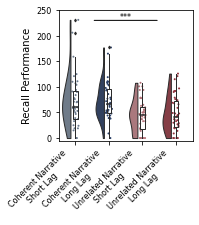

In [25]:
fig, ax = plt.subplots(figsize=(2.4, 2.4), facecolor='none')

xtick_order = ['coherent_short', 'coherent_long', 'unrelated_short', 'unrelated_long']
xtick_labels = {
    'coherent_short': 'Coherent Narrative\nShort Lag         ',
    'coherent_long': 'Coherent Narrative\nLong Lag         ',
    'unrelated_short': 'Unrelated Narrative\nShort Lag         ',
    'unrelated_long': 'Unrelated Narrative\nLong Lag         '
}
xtick_colors = {
    'coherent_short': '#6b7a8d',
    'coherent_long': '#2a3f67',
    'unrelated_short': '#b27077',
    'unrelated_long': '#91323d'
}

ax=pt.half_violinplot( 
    data=recall[recall['coherence']!='mainplot'].groupby(['subject', 'coherence', 'lag', 'condition']).sum().sort_values(by=['word_count']).reset_index(),
    x='condition', 
    y='word_count', 
    hue='condition',
    hue_order=xtick_order,
    palette = xtick_colors, 
    bw = .5, 
    cut = 0.,
    scale = "area", 
    width = .5, 
    inner = None,
    order = xtick_order, 
    split=True,
    linewidth=1,
    # orient = ort
    )

ax=sns.boxplot( 
    data=recall[recall['coherence']!='mainplot'].groupby(['subject', 'coherence', 'lag', 'condition']).sum().sort_values(by=['word_count']).reset_index(),
    x='condition', 
    y='word_count', 
    palette = xtick_colors, 
    width = .14, 
    order = xtick_order,
    fliersize=2,
    zorder = 10,\
            showcaps = False, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':1},\
            showfliers=True, whiskerprops = {'linewidth':1, "zorder":10},\
            #    saturation = 1, orient = ort
               )

ax=sns.stripplot( 
    data=recall[recall['coherence']!='mainplot'].groupby(['subject', 'coherence', 'lag', 'condition']).sum().sort_values(by=['word_count']).reset_index(),
    x='condition', 
    y='word_count', 
    palette = xtick_colors, 
    edgecolor = "white",
    size = 2, 
    jitter = 1, 
    zorder = 0,
    order = xtick_order,
    # orient = ort
    )

ax.set_ylabel('Recall Performance')
ax.set_xlabel('')
ax.set_xticks(range(len(xtick_order)))
ax.set_xticklabels([xtick_labels[label] for label in xtick_order], rotation=45, ha='right')

xy = (0.5, 230)
xytext = (2.5, 230)
center = ((xy[0] + xytext[0]) / 2, (xy[1] + xytext[1]) / 2)

ax.annotate('', xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center[0], center[1] + 15, '***', ha='center', va='top', fontsize=8)
ax.set_ylim(-5, 250)  
ax.tick_params(labelsize=8)
ax.legend_.remove()

# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vC2_recall_performance_vertical_raincloud.png', dpi=300, bbox_inches='tight')

In [15]:
recall[recall['coherence']!='mainplot'].groupby(['subject', 'coherence', 'lag', 'condition']).sum().sort_values(by=['word_count']).reset_index()

,subject,coherence,lag,condition,version,act,correct_order,response_order,word_count
0,627,unrelated,long,unrelated_long,40,3,21.0,0.0,0.0
1,644,unrelated,short,unrelated_short,26,3,17.0,0.0,0.0
2,628,unrelated,short,unrelated_short,60,3,21.0,0.0,0.0
3,633,unrelated,short,unrelated_short,64,3,21.0,0.0,0.0
4,647,unrelated,short,unrelated_short,40,3,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
151,647,coherent,short,coherent_short,80,5,29.0,56.0,159.0
152,612,coherent,long,coherent_long,8,3,17.0,22.0,165.0
153,604,coherent,long,coherent_long,3,4,25.0,28.0,177.0
154,604,coherent,short,coherent_short,2,3,21.0,30.0,206.0


## Evaluating Temporal, Narrative Category, and Semantic Clusters in Free Recall

### Temporal Clustering

#### Lag-CRP with ALL conditions here.

In [26]:
fr.lag_crp(story_df).head()

,subject,lag,prob,actual,possible
0,604,-17.0,NaN,0,0
1,604,-16.0,NaN,0,0
2,604,-15.0,NaN,0,0
3,604,-14.0,NaN,0,0
4,604,-13.0,NaN,0,0


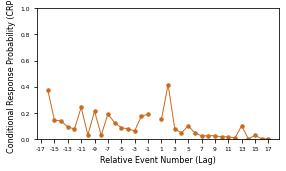

In [27]:
fig, ax = plot_lag_crp(
    data=fr.lag_crp(story_df), 
    condition=condition_colors['temporal_cluster_dark']
    )

# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/kramer2.0_vC2_lagcrp_all.png', dpi=300, bbox_inches='tight')

### Lag Ranks

In [21]:
lagrank_coherent = fr.lag_rank(story_df, test_key='coherence', test=lambda x, y: x == 'coherent')
# lagrank_coherent['coherence']='coherent'
lagrank_coherent.head()

/Users/aidelarazan/miniconda3/envs/raincloud/lib/python3.8/site-packages/psifr/measures.py:238: RuntimeWarning: Mean of empty slice
  {'subject': subject, 'rank': np.nanmean(ranks)}, index=[subject]


,subject,rank
0,604,0.641026
1,605,0.607143
2,606,1.000000
3,611,0.685897
4,612,0.963370


In [22]:
lagrank_unrelated = fr.lag_rank(story_df, test_key='coherence', test=lambda x, y: x == 'unrelated')
# lagrank_unrelated['coherence']='unrelated'
lagrank_unrelated.head()

/Users/aidelarazan/miniconda3/envs/raincloud/lib/python3.8/site-packages/psifr/measures.py:238: RuntimeWarning: Mean of empty slice
  {'subject': subject, 'rank': np.nanmean(ranks)}, index=[subject]


,subject,rank
0,604,1.000000
1,605,1.000000
2,606,0.923077
3,611,0.903571
4,612,0.750000


In [23]:
lagrank_mainplot = fr.lag_rank(story_df, test_key='coherence', test=lambda x, y: x == 'mainplot')
# lagrank_mainplot['coherence']='mainplot'
lagrank_mainplot.head()

,subject,rank
0,604,0.878108
1,605,0.668023
2,606,0.950265
3,611,0.727848
4,612,0.817130


In [24]:
lagrank_combined = pd.concat([lagrank_coherent, lagrank_unrelated, lagrank_mainplot], keys=['coherent', 'unrelated', 'mainplot'], axis=0)
lagrank_combined.index.set_names('coherence', level=0, inplace=True)
lagrank_combined.reset_index(inplace=True)
lagrank_combined.dropna(subset=['rank'], inplace=True)
lagrank_combined

,coherence,level_1,subject,rank
0,coherent,0,604,0.641026
1,coherent,1,605,0.607143
2,coherent,2,606,1.000000
3,coherent,3,611,0.685897
4,coherent,4,612,0.963370
...,...,...,...,...
112,mainplot,34,653,0.680774
113,mainplot,35,654,0.654762
114,mainplot,36,655,0.910119
115,mainplot,37,656,0.759207


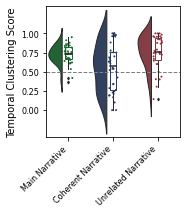

In [25]:
fig, ax = plt.subplots(figsize=(2.4, 2.4), facecolor='none')

xtick_order = ['mainplot', 'coherent', 'unrelated']
xtick_labels = {
    'mainplot': 'Main Narrative',
    'coherent': 'Coherent Narrative',
    'unrelated': 'Unrelated Narrative'
}
xtick_colors = {
    'mainplot': condition_colors['mainplot'],
    'coherent': condition_colors['coherent'],
    'unrelated': condition_colors['unrelated']
}

ax.axhline(y=0.5, color='grey', linestyle='--', linewidth=1)

violins=pt.half_violinplot( 
    data=lagrank_combined,
    x='coherence',
    y='rank',
    hue='coherence',
    hue_order=xtick_order,
    palette = xtick_colors, 
    bw = .5, 
    cut = 2,
    scale = "area", 
    width = .6, 
    inner = None,
    order = xtick_order, 
    split=True,
    linewidth=1,
    # orient = ort
    )

violins=sns.boxplot( 
    data=lagrank_combined,
    x='coherence',
    y='rank',
    palette = xtick_colors, 
    width = .14, 
    order = xtick_order,
    fliersize=2,
    zorder = 10,\
            showcaps = False, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':1},\
            showfliers=True, whiskerprops = {'linewidth':1, "zorder":10},\
            #    saturation = 1, orient = ort
               )

violins=sns.stripplot( 
    data=lagrank_combined,
    x='coherence',
    y='rank',
    palette = xtick_colors, 
    edgecolor = "white",
    size = 2, 
    jitter = 1, 
    zorder = 0,
    order = xtick_order,
    # orient = ort
    )

# Set edge colors for violins
for i, viol in enumerate(violins.artists):
    viol.set_edgecolor(xtick_colors[xtick_order[i]])

ax.set_xlabel('')
ax.set_ylabel('Temporal Clustering Score')
ax.set_yticks(range(len(xtick_order)))
ax.set_xticklabels([xtick_labels[cat] for cat in xtick_order], fontsize=8)
ax.set_xticklabels([xtick_labels[label] for label in xtick_order], rotation=45, ha='right')
ax.set_ylim(-0.35, 1.35)  # Set the y-axis limits from 0 to 1
ax.set_yticks([i / 4 for i in range(5)])
ax.set_yticklabels([f'{i / 4:.2f}' for i in range(5)], fontsize=6)
ax.tick_params(axis='y', labelsize=8)
ax.legend_.remove()
# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vC2_temporal_clustering_coherence.png', dpi=300, bbox_inches='tight')

##### Lag Rank

We can summarize the tendency to group together nearby items by running a lag rank analysis [PNK09] using lag_rank(). For each recall, this determines the absolute lag of all remaining items available for recall and then calculates their percentile rank. Then the rank of the actual transition made is taken, scaled to vary between 0 (furthest item chosen) and 1 (nearest item chosen). Chance clustering will be 0.5; clustering above that value is evidence of a temporal contiguity effect.

In [66]:
fr.lag_rank(story_df).head()

,subject,rank
0,604,0.844718
1,605,0.705047
2,606,0.958296
3,611,0.745201
4,612,0.838877


Compare temporal rank to chance.

In [27]:
temporal_cluster = pd.merge(recall.groupby(['subject'])['word_count'].sum().reset_index(), fr.lag_rank(story_df), how='inner')
temporal_cluster = temporal_cluster.rename(columns={'rank':'temporal_rank'})
temporal_cluster['rank_type']='temporal'
temporal_cluster['chance_rank'] = 0.5
temporal_cluster.head()


,subject,word_count,temporal_rank,rank_type,chance_rank
0,604,1352.0,0.844718,temporal,0.5
1,605,620.0,0.705047,temporal,0.5
2,606,533.0,0.958296,temporal,0.5
3,611,667.0,0.745201,temporal,0.5
4,612,1350.0,0.838877,temporal,0.5


(<Figure size 172.8x172.8 with 1 Axes>,
 <Axes: xlabel='Temporal Clustering Score'>)

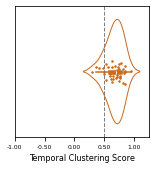

In [68]:
plot_ranks(
    data=temporal_cluster,
    y='rank_type',
    x='temporal_rank',
    color=condition_colors['temporal_cluster_dark'],
    dot_color=condition_colors['temporal_cluster_dark'],
    y_label='Temporal Clustering Score',
    chance=0.5
)

# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_01.12.2024/kramer2.0_vC2_temporal_clustering.png', dpi=300, bbox_inches='tight')

[Text(0, 0, '0.00'),
 Text(0, 0, '0.25'),
 Text(0, 0, '0.50'),
 Text(0, 0, '0.75'),
 Text(0, 0, '1.00')]

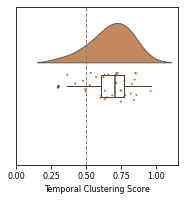

In [28]:
fig, ax = plt.subplots(figsize=(2.9, 2.9), facecolor='none')

ax=pt.half_violinplot( 
    data=temporal_cluster,
    y='rank_type',
    x='temporal_rank',
    color = condition_colors['temporal_cluster_dark'],
    bw = .5, 
    cut = 2,
    scale = "area", 
    width = .5, 
    inner = None,
    alpha=.8,
    split=True,
    linewidth=1,
    orient = 'h'
    )

ax=sns.boxplot( 
    data=temporal_cluster,
    y='rank_type',
    x='temporal_rank',
    color = condition_colors['temporal_cluster_dark'],
    width = .14, 
    # order = xtick_order,
    fliersize=2,
    zorder = 10,\
            showcaps = False, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':1},\
            showfliers=True, whiskerprops = {'linewidth':1, "zorder":10},\
            #    saturation = 1, orient = ort
               )

ax=sns.stripplot( 
    data=temporal_cluster,
    y='rank_type',
    x='temporal_rank',
    color = condition_colors['temporal_cluster_dark'],
    edgecolor = "white",
    size = 2, 
    jitter = 1, 
    zorder = 0,
    # order = xtick_order,
    # orient = ort
    )

chance=0.5

ax.set_ylabel('')
ax.set_xlabel('Temporal Clustering Score', fontsize=8)
ax.set_yticks([])
ax.axvline(x=chance, color='grey', linestyle='--', linewidth=1) 
ax.tick_params(axis='y', labelsize=6)

    # Set x-axis ticks and labels from 0 to 1 in increments of 0.25 (temporal cluster and semantic cluster)
ax.set_xticks([i / 4 for i in range(5)])
ax.set_xticklabels([f'{i / 4:.2f}' for i in range(5)], fontsize=8)

#     # Set x-axis limits from -1 to 1 in increments of 0.5 (category ARC)
# ax.set_xlim(-1, 1.25)
# ax.set_xticks([i / 2 for i in range(-2, 3)])  # -2, -1, 0, 1, 2
# ax.set_xticklabels([f'{i / 2:.2f}' for i in range(-2, 3)], fontsize=6)  # -1.0, -0.5, 0.0, 0.5, 1.0

# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vC2_temporal_clustering_raincloud.png', dpi=300, bbox_inches='tight')

#### Correlations between Temporal Rank and Recall Performance

(<Figure size 172.8x172.8 with 1 Axes>,
 <Axes: xlabel='Temporal Clustering Score', ylabel='Recall Performance'>)

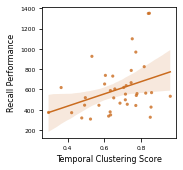

In [72]:
plot_correlation(
    data=temporal_cluster,
    x='temporal_rank',
    y='word_count',
    color=condition_colors['temporal_cluster_dark'],
    xlabel='Temporal Clustering Score',
    ylabel='Recall Performance'
)

# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/kramer2.0_vC2_correlation_temporal_clustering_word_count.png', dpi=300, bbox_inches='tight')

#### Category Clustering

##### Category Clustering Based on Probability

In [74]:
fr.category_crp(story_df, category_key='coherence').head()

,subject,prob,actual,possible
0,604,0.428571,6,14
1,605,0.692308,9,13
2,606,0.444444,4,9
3,611,0.461538,6,13
4,612,0.285714,4,14


Compare category clustering to chance.

In [75]:
category_cluster = pd.merge(recall.groupby(['subject'])['word_count'].sum().reset_index(), fr.category_crp(story_df, category_key='coherence'), how='inner')
category_cluster = pd.merge(category_cluster, fr.category_clustering(story_df, category_key='coherence'), how='inner')
category_cluster = category_cluster.rename(columns={
    'prob':'category_prob',
    'arc':'category_arc',
    'lbc':'category_lbc'
    })
category_cluster['rank_type']='category'
category_cluster['chance_prob'] = 0.3 # because there are 3 categories
category_cluster['chance_arc'] = 0.0
category_cluster.head()


,subject,word_count,category_prob,actual,possible,category_lbc,category_arc,rank_type,chance_prob,chance_arc
0,604,1352.0,0.428571,6,14,1.294118,-0.046154,category,0.3,0.0
1,605,620.0,0.692308,9,13,4.882353,0.521277,category,0.3,0.0
2,606,533.0,0.444444,4,9,1.058824,-0.047619,category,0.3,0.0
3,611,667.0,0.461538,6,13,2.176471,0.186047,category,0.3,0.0
4,612,1350.0,0.285714,4,14,-0.705882,-0.307692,category,0.3,0.0


(<Figure size 172.8x172.8 with 1 Axes>,
 <Axes: xlabel='Category Clustering (Probability)'>)

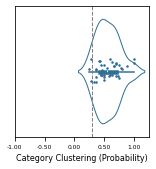

In [76]:
plot_ranks(
    data=category_cluster,
    y='rank_type',
    x='category_prob',
    color=condition_colors['category_cluster_dark'],
    dot_color=condition_colors['category_cluster_dark'],
    y_label='Category Clustering (Probability)',
    chance=0.3
)

#### Correlations between Category Probability and Recall Performance

(<Figure size 172.8x172.8 with 1 Axes>,
 <Axes: xlabel='Category Clustering (Probability)', ylabel='Recall Performance'>)

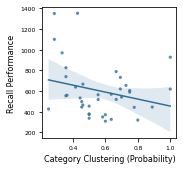

In [79]:
plot_correlation(
    data=category_cluster,
    x='category_prob',
    y='word_count',
    color=condition_colors['category_cluster_dark'],
    xlabel='Category Clustering (Probability)',
    ylabel='Recall Performance'
)

#### Adjusted Ratio of Clustering

A number of measures have been developed to measure category clustering relative to that expected due to chance, under certain assumptions. Two such measures are list-based clustering (LBC) [SBW+02] and adjusted ratio of clustering (ARC) [RTB71].

(<Figure size 172.8x172.8 with 1 Axes>,
 <Axes: xlabel='Narrative Category Clustering Score'>)

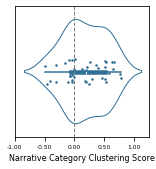

In [81]:
plot_ranks(
    data=category_cluster,
    y='rank_type',
    x='category_arc',
    color=condition_colors['category_cluster_dark'],
    dot_color=condition_colors['category_cluster_dark'],
    y_label='Narrative Category Clustering Score',
    chance=0
)

# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_01.12.2024/kramer2.0_vC2_category_arc_clustering.png', dpi=300, bbox_inches='tight')

##### Correlations between ARC and Recall Performance

(<Figure size 172.8x172.8 with 1 Axes>,
 <Axes: xlabel='Narrative Category Clustering Score', ylabel='Recall Performance'>)

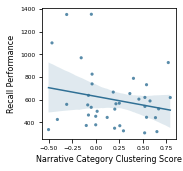

In [83]:
plot_correlation(
    data=category_cluster,
    x='category_arc',
    y='word_count',
    color=condition_colors['category_cluster_dark'],
    xlabel='Narrative Category Clustering Score',
    ylabel='Recall Performance'
)

# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_01.12.2024/kramer2.0_vC2_correlation_category_arc_clustering_word_count.png', dpi=300, bbox_inches='tight')

#### Semantic Similarity Clustering

While the category CRP examines clustering based on semantic similarity at a coarse level (i.e., whether two items are in the same category or not), recall may also depend on more nuanced semantic relationships.

Models of semantic knowledge allow the semantic similarity between pairs of items to be quantified. If you have such a model defined for your stimulus pool, you can use the distance CRP analysis to examine how semantic similarity affects recall transitions [HK02, MP16].

Steps:
1. Obtain sentence embeddings of each encoding item from USE
2. Extract the item and embedding into an array. Calculate the correlation. This will result in a 26x26 matrix for each item.
3. Index it and add it to the dataframe (in our case, it is story_df).
4. Run distance_rank analyses using psifr.

In [85]:
encoded_story_embeddings = story[['item', 'detail']]
encoded_story_embeddings = encoded_story_embeddings.drop_duplicates(subset=['item'])
encoded_story_embeddings.reset_index(drop=True, inplace=True)
encoded_story_embeddings.head()

,item,detail
0,charles1A,It was Charles Bort’s big break: there was fin...
1,beatrice1A,"A tremor ran through his leg, as his phone rec..."
2,charles1B,"The newsroom was quiet, but Charles could make..."
3,melvin1A,Charles was interrupted by a video call from M...
4,charles1C,Twenty minutes later Charles chained the bike ...


In [86]:
story_embeddings = []

for i in range(len(encoded_story_embeddings)):
    item = encoded_story_embeddings.loc[i, 'item']
    detail = encoded_story_embeddings.loc[i, 'detail']
    embedded = np.array(embed([detail]))
    embedding = embedded.squeeze() ## This gets it out of the extra dimension.

    curr_dict = {
        'item': item, 
        'detail': detail,
        'embedding': embedding
    }

    story_embeddings.append(curr_dict)
story_embeddings = pd.DataFrame(story_embeddings)
story_embeddings.head()

,item,detail,embedding
0,charles1A,It was Charles Bort’s big break: there was fin...,"[-0.025818096, 0.012939302, 0.0051612426, -0.0..."
1,beatrice1A,"A tremor ran through his leg, as his phone rec...","[-0.035725664, 0.037785117, 0.027241783, -0.04..."
2,charles1B,"The newsroom was quiet, but Charles could make...","[-0.05018931, 0.014588034, -0.001451634, -0.01..."
3,melvin1A,Charles was interrupted by a video call from M...,"[0.03513451, 0.0018453865, 0.038247604, -0.052..."
4,charles1C,Twenty minutes later Charles chained the bike ...,"[-0.05587792, 0.005138666, 0.016183615, -0.040..."


In [88]:
embeddings = np.stack(story_embeddings['embedding'].values)
correlations = np.inner(embeddings, embeddings)
norms = np.linalg.norm(embeddings, axis=1)
correlations /= np.outer(norms, norms)

In [89]:
item_indices = story_embeddings.index.values
item_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [90]:
story_correlations = (
    story_embeddings['item'].values,  
    correlations
)

# story_correlations

In [91]:
## Now we just follow the code that is on psfir

items, distances = story_correlations
story_df['item_index'] = fr.pool_index(story_df['item'], items)
np.fill_diagonal(distances, 0)
edges = np.percentile(squareform(distances), np.linspace(1, 99, 10))

In [92]:
fr.distance_crp(story_df, 'item_index', distances, edges).head()

,subject,center,bin,prob,actual,possible
0,604,0.273231,"(0.226, 0.321]",0.111111,2,18
1,604,0.339923,"(0.321, 0.359]",0.076923,1,13
2,604,0.370381,"(0.359, 0.381]",0.066667,1,15
3,604,0.395352,"(0.381, 0.409]",0.083333,1,12
4,604,0.426229,"(0.409, 0.443]",0.142857,2,14


(0.0, 0.2)

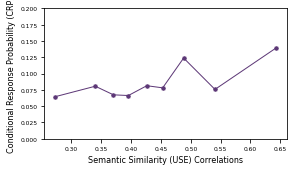

In [93]:
# Assuming fr.distance_crp() returns a DataFrame with columns 'center' and 'prob'
data = fr.distance_crp(story_df, 'item_index', distances, edges)

fig, ax = plt.subplots(figsize=(4.35, 2.4), facecolor='none')

sns.lineplot(
        data=data,
        x='center',
        y='prob',
        linewidth=1,
        markers=True,
        errorbar=None,
        color=condition_colors['semantic_cluster_dark'],
        ax=ax
    )

# Calculate the mean of the 'center' and 'prob' columns grouped by 'bin'
mean_values = data.groupby('bin').agg({'center': 'mean', 'prob': 'mean'}).reset_index()

# Plot the mean as a single point (dot)
sns.scatterplot(
    x=mean_values['center'],
    y=mean_values['prob'],
    color=condition_colors['semantic_cluster_dark'],
    s=25,  # Dot size
    ax=ax
)

# Setting labels and font sizes
ax.set_xlabel('Semantic Similarity (USE) Correlations', fontsize=8)
ax.set_ylabel('Conditional Response Probability (CRP)', fontsize=8)
ax.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=6)
ax.set_ylim(0, 0.2)


# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/kramer2.0_vC2_semanticcrp_all.png', dpi=300, bbox_inches='tight')

#### Semantic Similarity Rank

Similarly to the lag rank analysis of temporal clustering, we can summarize distance-based clustering (such as semantic clustering) with a single rank measure [PNK09]. The distance rank varies from 0 (the most-distant item is always recalled) to 1 (the closest item is always recalled), with chance clustering corresponding to 0.5. Given a matrix of item distances, we can calculate distance rank using distance_rank().

In [95]:
fr.distance_rank(story_df, 'item_index', distances).head()

,subject,rank
0,604,0.474850
1,605,0.416177
2,606,0.549398
3,611,0.449805
4,612,0.522030


Compare semantic similarity rank to chance.

In [96]:
semantic_cluster = pd.merge(recall.groupby(['subject'])['word_count'].sum().reset_index(), fr.distance_rank(story_df, 'item_index', distances), how='inner')
semantic_cluster = semantic_cluster.rename(columns={'rank':'semantic_rank'})
semantic_cluster['rank_type']='semantic'
semantic_cluster['chance_rank'] = 0.5
semantic_cluster.head()


,subject,word_count,semantic_rank,rank_type,chance_rank
0,604,1352.0,0.474850,semantic,0.5
1,605,620.0,0.416177,semantic,0.5
2,606,533.0,0.549398,semantic,0.5
3,611,667.0,0.449805,semantic,0.5
4,612,1350.0,0.522030,semantic,0.5


(<Figure size 172.8x172.8 with 1 Axes>,
 <Axes: xlabel='Semantic Similarity Clustering Score'>)

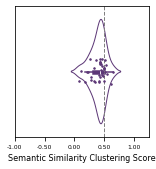

In [97]:
plot_ranks(
    data=semantic_cluster,
    y='rank_type',
    x='semantic_rank',
    color=condition_colors['semantic_cluster_dark'],
    dot_color=condition_colors['semantic_cluster_dark'],
    y_label='Semantic Similarity Clustering Score',
    chance=0.5
)


# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_01.12.2024/kramer2.0_vC2_semantic_clustering.png', dpi=300, bbox_inches='tight')

#### Correlations between Semantic Rank and Recall Performance

(<Figure size 172.8x172.8 with 1 Axes>,
 <Axes: xlabel='Semantic Similarity Clustering Score', ylabel='Recall Performance'>)

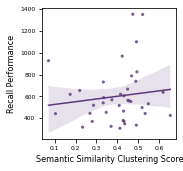

In [100]:
plot_correlation(
    data=semantic_cluster,
    x='semantic_rank',
    y='word_count',
    color=condition_colors['semantic_cluster_dark'],
    xlabel='Semantic Similarity Clustering Score',
    ylabel='Recall Performance'
)


# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/kramer2.0_vC2_correlation_semantic_clustering_word_count.png', dpi=300, bbox_inches='tight')

### Distance Between Paired Events

In [29]:
# Drop duplicates keeping the lower response_order
recall_drop_duplicates = recall.sort_values('response_order').drop_duplicates(
    subset=['subject', 'version', 'character', 'coherence', 'lag', 'condition', 'act'], keep='first')

# Create pivot table
recall_distance = recall_drop_duplicates.pivot_table(
    index=['subject', 'version', 'character', 'coherence', 'lag', 'condition'],
    columns='act',
    values=['response_order', 'word_count'],
    aggfunc='mean'
).reset_index()

# Flatten multi-level columns
recall_distance.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in recall_distance.columns]

# Function to determine exclusion
def exclusion(row):
    if pd.isnull(row['response_order_1']) or pd.isnull(row['response_order_2']) or pd.isnull(row['word_count_1']) or pd.isnull(row['word_count_2']):
        return 'exclude'
    else:
        return 'include'

# Apply the function to create the 'exclusion' column
recall_distance['exclusion'] = recall_distance.apply(exclusion, axis=1)

recall_distance['distance'] = recall_distance['response_order_2'].values - recall_distance['response_order_1'].values
recall_distance['abs_distance'] = abs(recall_distance['response_order_2'].values - recall_distance['response_order_1'].values)
recall_distance

recall_distance

,subject,version,character,coherence,lag,condition,response_order_1,response_order_2,word_count_1,word_count_2,exclusion,distance,abs_distance
0,604,1,beatrice,unrelated,long,unrelated_long,3.0,NaN,9.0,NaN,exclude,NaN,NaN
1,604,1,charles,mainplot,mainplot,mainplot_mainplot,1.0,13.0,24.0,12.0,include,12.0,12.0
2,604,1,johnny,coherent,short,coherent_short,11.0,19.0,108.0,98.0,include,8.0,8.0
3,604,1,melvin,coherent,long,coherent_long,4.0,17.0,6.0,101.0,include,13.0,13.0
4,604,1,sandra,unrelated,short,unrelated_short,5.0,18.0,2.0,23.0,include,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,657,13,beatrice,coherent,long,coherent_long,15.0,16.0,85.0,13.0,include,1.0,1.0
174,657,13,charles,mainplot,mainplot,mainplot_mainplot,1.0,11.0,64.0,47.0,include,10.0,10.0
175,657,13,johnny,unrelated,short,unrelated_short,4.0,NaN,47.0,NaN,exclude,NaN,NaN
176,657,13,melvin,coherent,short,coherent_short,9.0,NaN,24.0,NaN,exclude,NaN,NaN


In [30]:
recall_distance = recall_distance[recall_distance['condition']!='mainplot_mainplot']
recall_distance = recall_distance[recall_distance['exclusion']!='exclude']
recall_distance.head()

,subject,version,character,coherence,lag,condition,response_order_1,response_order_2,word_count_1,word_count_2,exclusion,distance,abs_distance
2,604,1,johnny,coherent,short,coherent_short,11.0,19.0,108.0,98.0,include,8.0,8.0
3,604,1,melvin,coherent,long,coherent_long,4.0,17.0,6.0,101.0,include,13.0,13.0
4,604,1,sandra,unrelated,short,unrelated_short,5.0,18.0,2.0,23.0,include,13.0,13.0
8,605,2,melvin,coherent,long,coherent_long,5.0,15.0,35.0,16.0,include,10.0,10.0
9,605,2,sandra,coherent,short,coherent_short,4.0,14.0,41.0,19.0,include,10.0,10.0


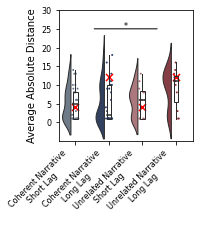

In [31]:
fig, ax = plt.subplots(figsize=(2.4, 2.4), facecolor='none')

xtick_order = ['coherent_short', 'coherent_long', 'unrelated_short', 'unrelated_long']
xtick_labels = {
    'coherent_short': 'Coherent Narrative\nShort Lag         ',
    'coherent_long': 'Coherent Narrative\nLong Lag         ',
    'unrelated_short': 'Unrelated Narrative\nShort Lag         ',
    'unrelated_long': 'Unrelated Narrative\nLong Lag         '
}
xtick_colors = {
    'coherent_short': '#6b7a8d',
    'coherent_long': '#2a3f67',
    'unrelated_short': '#b27077',
    'unrelated_long': '#91323d'
}

ax=pt.half_violinplot( 
    data=recall_distance[recall_distance['coherence']!='mainplot'].groupby(['subject', 'coherence', 'lag', 'condition']).sum().reset_index(), 
    x='condition',
    y='abs_distance',
    hue='condition',
    hue_order=xtick_order,
    palette = xtick_colors, 
    bw = .5, 
    cut = 2,
    scale = "area", 
    width = .5, 
    inner = None,
    order = xtick_order, 
    split=True,
    linewidth=1,
    # orient = ort
    )

ax=sns.boxplot( 
    data=recall_distance[recall_distance['coherence']!='mainplot'].groupby(['subject', 'coherence', 'lag', 'condition']).sum().reset_index(), 
    x='condition',
    y='abs_distance',
    palette = xtick_colors, 
    width = .14, 
    order = xtick_order,
    fliersize=2,
    zorder = 10,\
            showcaps = False, boxprops = {'facecolor':'none', "zorder":10, 'linewidth':1},\
            showfliers=True, whiskerprops = {'linewidth':1, "zorder":10},\
            #    saturation = 1, orient = ort
               )

ax=sns.stripplot( 
    data=recall_distance[recall_distance['coherence']!='mainplot'].groupby(['subject', 'coherence', 'lag', 'condition']).sum().reset_index(), 
    x='condition',
    y='abs_distance',
    hue='condition',
    palette = xtick_colors, 
    edgecolor = "white",
    size = 2, 
    jitter = 1, 
    zorder = 0,
    order = xtick_order,
    # orient = ort
    )

ax.set_ylabel('Average Absolute Distance')
ax.set_xlabel('')
ax.set_xticks(range(len(xtick_order)))
ax.set_xticklabels([xtick_labels[label] for label in xtick_order], rotation=45, ha='right')

xy = (0.5, 25)
xytext = (2.5, 25)
center = ((xy[0] + xytext[0]) / 2, (xy[1] + xytext[1]) / 2)

ax.annotate('', xy=xy, xytext=xytext, arrowprops=dict(arrowstyle='-', color='black'))
ax.text(center[0], center[1] + 2, '*', ha='center', va='top', fontsize=8)
ax.set_ylim(-4.9, 30)  
ax.tick_params(labelsize=8)
ax.legend_.remove()

# Calculate the positions for the X marks
x_positions = [0, 1, 2, 3]  # Assuming the bars are at these x-positions
y_positions = [4, 12, 4, 12]  # Desired y-positions for the X marks

# Add X marks on the bars
for x, y in zip(x_positions, y_positions):
    ax.scatter(x, y, marker='x', color='red', s=50, zorder=3)  # Adjust 's' for size

# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vC2_recall_distance_vertical.png', dpi=300, bbox_inches='tight')


# Serial Position Curves

In [32]:
story_df.groupby('coherence').apply(fr.spc).head()

subject  input  recall
coherence                          
coherent  0      604    4.0     1.0
          1      604    8.0     1.0
          2      604   13.0     1.0
          3      604   17.0     1.0
          4      605    4.0     1.0

In [143]:
spc = story_df.groupby('coherence').apply(fr.spc).reset_index()
spc['act'] = spc['input'].apply(lambda x: 1 if x < 10 else 2)
spc['recall'] = spc['recall'].astype(int)
spc['exp'] = 1
spc

,coherence,level_1,subject,input,recall,act,exp
0,coherent,0,604,4.0,1,1,1
1,coherent,1,604,8.0,1,1,1
2,coherent,2,604,13.0,1,2,1
3,coherent,3,604,17.0,1,2,1
4,coherent,4,605,4.0,1,1,1
...,...,...,...,...,...,...,...
697,unrelated,151,656,17.0,0,2,1
698,unrelated,152,657,2.0,1,1,1
699,unrelated,153,657,6.0,1,1,1
700,unrelated,154,657,11.0,0,2,1


In [144]:
spc_mainplot = spc[spc['coherence']=='mainplot']
spc_coherent = spc[spc['coherence']=='coherent']
spc_unrelated = spc[spc['coherence']=='unrelated']

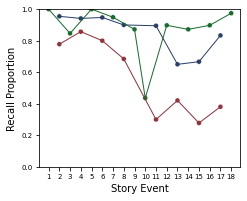

In [158]:
data = story_df.groupby('coherence').apply(fr.spc)

fig, ax = plt.subplots(figsize=(3.6, 2.9), facecolor='none')

xtick_order = ['mainplot', 'coherent', 'unrelated']
xtick_labels = {
    'mainplot': 'Main Narrative',
    'coherent': 'Coherent Narrative',
    'unrelated': 'Unrelated Narrative'
}
xtick_colors = {
    'mainplot': condition_colors['mainplot'],
    'coherent': condition_colors['coherent'],
    'unrelated': condition_colors['unrelated']
}

# Plotting the lineplot
sns.lineplot(
    data=data,
    x='input',
    y='recall',
    hue='coherence',
    palette=xtick_colors,
    linewidth=1,
    markers=True,
    errorbar=None,
    legend=True,
    ax=ax
)

# Calculate the mean of the 'recall' grouped by 'input'
mean_values = data.groupby(['coherence', 'input'])['recall'].mean().reset_index()

# Plot the mean as a single point (dot) on top of the line plot
sns.scatterplot(
    x=mean_values['input'],
    y=mean_values['recall'],
    hue=mean_values['coherence'],
    palette=xtick_colors,
    s=25,  # Dot size
    legend=False,
    ax=ax
)

# Setting labels and font sizes
ax.set_xlabel('Story Event')
ax.set_ylabel('Recall Proportion')
ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)
ax.set_xticks(range(1, 19))  # Set x-tick positions from 1 to 18
ax.set_xticklabels(range(1, 19), fontsize=7)
ax.set_ylim(0, 1)
ax.legend_.remove()

# plt.show()


# plt.savefig('/Users/aidelarazan/Box Sync/aidelarazan_box/Projects/kramer2.0/figures/updated_figures_03.09.2024/kramer2.0_vC2_serial_position_curve.png', dpi=300, bbox_inches='tight')
